In [32]:
from google.colab import drive
drive.mount('/content/drive')
#!cd 'drive/My Drive/RL_Code'
%cd drive/My Drive/audio_files
import numpy as np

import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/audio_files'
/content/drive/.shortcut-targets-by-id/1aAYuSxypZP_SPhLV_46sl8oDgMFziC1s/audio_files


In [2]:
# a = np.load('inputs.npy',allow_pickle=True)
a = np.load('rounded_inputs.npy',allow_pickle=True)

# Uncomment this to change the shape of inputs
# new_a = []
# for e in a:
#   new_a.append(e[:len(e)-(len(e)%1000)])
# len(new_a)
# np.save("rounded_inputs.npy", np.array(new_a))

In [3]:
flattened = np.hstack(a)
noise = np.random.normal(0, 0.001, (int(flattened.shape[0]),))
noisy_data = noise + flattened
X_shaped = np.reshape(noisy_data, (int(flattened.shape[0]/1000), 1000))
Y_shaped = np.reshape(flattened, (int(flattened.shape[0]/1000), 1000))

In [17]:

# model = keras.models.load_model("audio_lstm")

model = Sequential()
model.add(Dense(2000, input_dim=1000, activation='tanh'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(2000, activation='tanh'))
model.add(Dense(1000, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.summary()
history = model.fit(X_shaped, Y_shaped, epochs=1000, batch_size=2048, verbose=2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_64 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_65 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_66 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_67 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_68 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_69 (Dense)            (None, 2000)            

KeyboardInterrupt: ignored

In [35]:
# Flatten into one large array and add noise
flattened = np.hstack(a)
noise = np.random.normal(0, 0.001, (int(flattened.shape[0]),))
noisy_data = noise + flattened

# Reshape inputs and outputs for training
X_shaped = np.reshape(noisy_data, (int(flattened.shape[0]/1000), 1, 1000))
Y_shaped = np.reshape(flattened, (int(flattened.shape[0]/1000), 1, 1000))

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_shaped, Y_shaped, test_size=0.25, random_state=42)

array([[[-3.02618122e-04,  1.79772502e-03,  6.38984981e-04, ...,
          1.58352661e-03,  2.04353036e-04, -9.76724776e-04]],

       [[-4.50089887e-02, -5.87954078e-02, -7.22819039e-02, ...,
         -2.09211251e-01, -2.05385395e-01, -2.05480175e-01]],

       [[-1.62787821e-01, -1.85092035e-01, -1.82437174e-01, ...,
          1.49408181e-01, -1.16884683e-01, -1.95938780e-01]],

       ...,

       [[ 5.50056449e-02,  3.63424640e-02,  2.38642917e-02, ...,
          2.71871606e-02,  2.84151379e-02,  1.99743784e-02]],

       [[ 3.46056604e-01,  3.08806970e-01,  2.61845112e-01, ...,
         -2.46867464e-01, -2.39777670e-01, -2.33494487e-01]],

       [[ 7.14695609e-03,  6.59256055e-03,  3.35410989e-03, ...,
          5.43680215e-03,  8.37433420e-05,  1.18962369e-02]]])

In [36]:
# create and fit the LSTM network
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# model = keras.models.load_model("audio_lstm")

model = Sequential()
model.add(LSTM((1000), input_shape=(1, 1000), return_sequences=True, activation='tanh'))
model.add(LSTM((1000), return_sequences=True, activation='tanh'))
model.add(LSTM((1000), return_sequences=True, activation='tanh'))
model.add(LSTM((1000), return_sequences=True, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train, epochs=400, batch_size=1024, verbose=2)
model.save("audio_lstm")

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 1000)           8004000   
                                                                 
 lstm_5 (LSTM)               (None, 1, 1000)           8004000   
                                                                 
 lstm_6 (LSTM)               (None, 1, 1000)           8004000   
                                                                 
 lstm_7 (LSTM)               (None, 1, 1000)           8004000   
                                                                 
Total params: 32,016,000
Trainable params: 32,016,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
40/40 - 12s - loss: 0.0251 - accuracy: 0.0015 - 12s/epoch - 300ms/step
Epoch 2/400
40/40 - 5s - loss: 0.0251 - accuracy: 0.0013 - 5s/epoch - 117ms/step
Epoch 3/4

INFO:tensorflow:Assets written to: audio_lstm/assets


INFO:tensorflow:Assets written to: audio_lstm/assets


In [8]:
#Continue training (if needed)
history2 = model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=2)

Epoch 1/1000
40/40 - 11s - loss: 9.1989e-04 - accuracy: 0.4748
Epoch 2/1000
40/40 - 1s - loss: 9.0589e-04 - accuracy: 0.5044
Epoch 3/1000
40/40 - 1s - loss: 9.0058e-04 - accuracy: 0.5216
Epoch 4/1000
40/40 - 1s - loss: 8.9829e-04 - accuracy: 0.5320
Epoch 5/1000
40/40 - 1s - loss: 8.9649e-04 - accuracy: 0.5468
Epoch 6/1000
40/40 - 1s - loss: 8.9515e-04 - accuracy: 0.5576
Epoch 7/1000
40/40 - 1s - loss: 8.9476e-04 - accuracy: 0.5624
Epoch 8/1000
40/40 - 1s - loss: 8.9388e-04 - accuracy: 0.5704
Epoch 9/1000
40/40 - 1s - loss: 8.9338e-04 - accuracy: 0.5708
Epoch 10/1000
40/40 - 1s - loss: 8.9300e-04 - accuracy: 0.5760
Epoch 11/1000
40/40 - 1s - loss: 8.9250e-04 - accuracy: 0.5856
Epoch 12/1000
40/40 - 1s - loss: 8.9220e-04 - accuracy: 0.5896
Epoch 13/1000
40/40 - 1s - loss: 8.9193e-04 - accuracy: 0.5904
Epoch 14/1000
40/40 - 1s - loss: 8.9164e-04 - accuracy: 0.5944
Epoch 15/1000
40/40 - 1s - loss: 8.9139e-04 - accuracy: 0.5972
Epoch 16/1000
40/40 - 1s - loss: 8.9131e-04 - accuracy: 0.6016


KeyboardInterrupt: ignored

In [11]:
model.save("audio_lstm")

INFO:tensorflow:Assets written to: audio_lstm/assets


INFO:tensorflow:Assets written to: audio_lstm/assets


Predicted: 


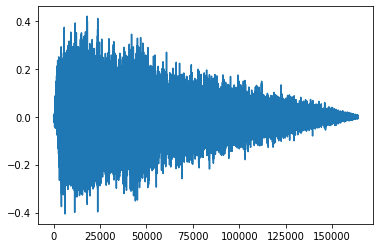

Original:


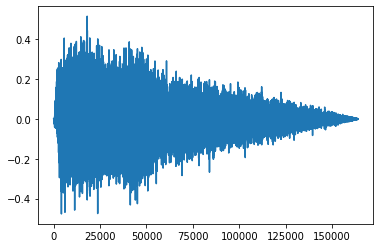

Predicted: 


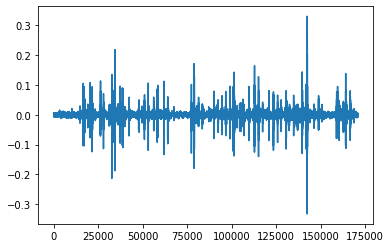

Original:


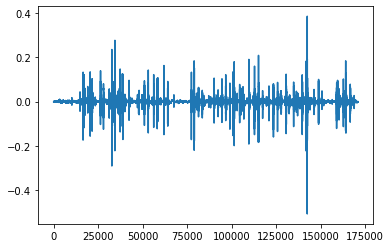

Predicted: 


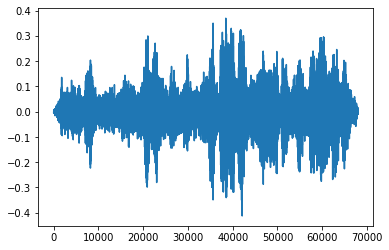

Original:


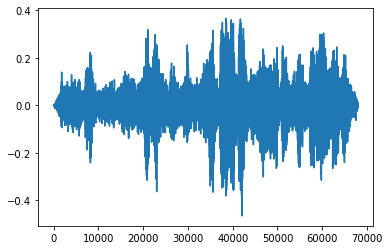

Predicted: 


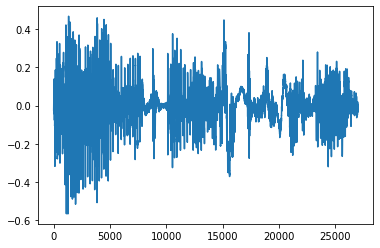

Original:


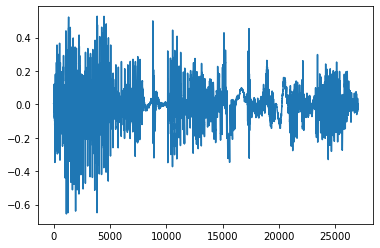

Predicted: 


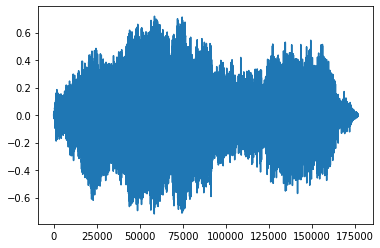

Original:


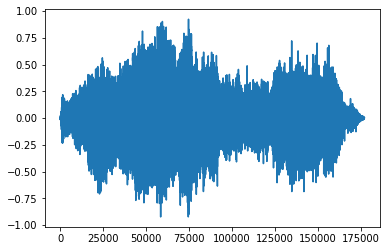

Predicted: 


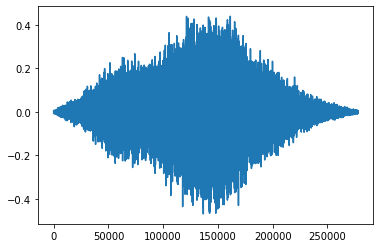

Original:


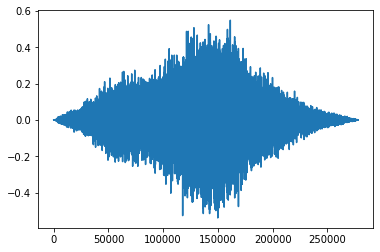

Predicted: 


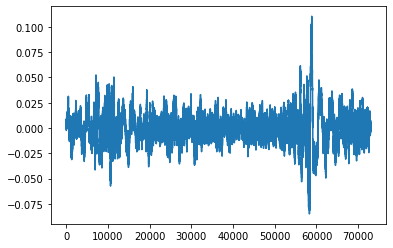

Original:


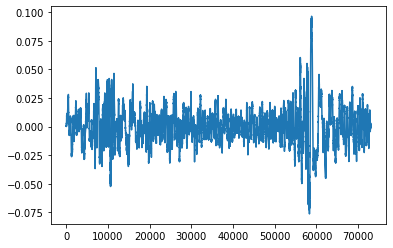

Predicted: 


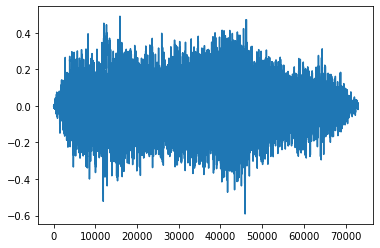

Original:


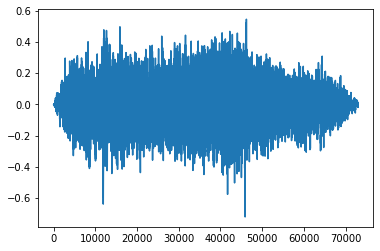

Predicted: 


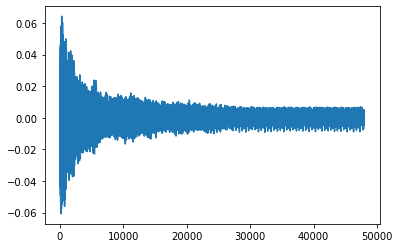

Original:


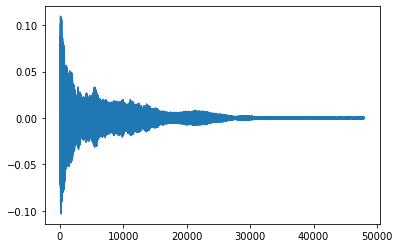

Predicted: 


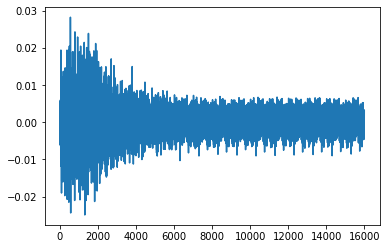

Original:


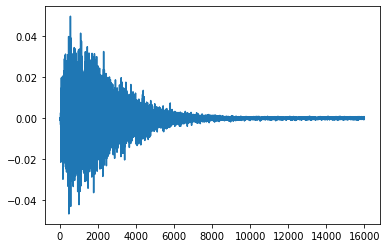

In [37]:
for audio_file in range(10):
  noise_test = np.random.normal(0, 0.0003, (a[audio_file].shape[0],))
  noisy_test_data = noise_test + a[audio_file]
  X_in = np.reshape(noisy_test_data, (int(a[audio_file].shape[0]/1000), 1, 1000))
  predict = model.predict(X_in)
  Y_out = np.reshape(predict, (a[audio_file].shape[0]))
  print('Predicted: ')
  plt.plot (Y_out)
  plt.show()
  print('Original:')
  plt.plot(noisy_test_data)
  plt.show()